## HW 3: Evaluating language models 
### COSC 426: Fall 2025, Colgate University

Use this notebook to run your experiments for Part 1, load and display from your experiment from Part 2, and answer the questions in all parts. Feel free to add as many code and markdown chunks as you would like in each of the sub-sections. 

**If you use any external resources (e.g., code snippets, reference articles), please cite them in comments or text!**

## Part 1: Train and evaluate bigram and trigram models 

In this section, include the experiments to train and evaluate bigram and trigram models. 


In [55]:
import importlib
import HW3 as h
import pandas as pd
importlib.reload(h) # to avoid constantly restarting the kernel

<module 'HW3' from '/Users/jeong/Projects/cosc426-projects/cosc426/hw/hw03/HW3.py'>

In [56]:
vocab = h.get_hf_vocab(modelname="distilgpt2")

# custom function to avoid reprocessing
aiwl_model = h.preprocess_and_cache(
    textfname="data/alice_in_wonderland.txt", 
    lower=True, 
    tokenizer=h.hf_tokenize, 
    modelname="distilgpt2",
    vocab=vocab
)

ttlg_model = h.preprocess_and_cache(
    textfname="data/through_the_looking_glass.txt",
    lower=True,
    tokenizer=h.hf_tokenize,
    modelname="distilgpt2",
    vocab=vocab
)

sh_model = h.preprocess_and_cache(
    textfname="data/sherlock_holmes.txt",
    lower=True,
    tokenizer=h.hf_tokenize,
    modelname="distilgpt2",
    vocab=vocab
)

Loading preprocessed tokens from cache: data/alice_in_wonderland_tokens.pkl
Successfully processed data/alice_in_wonderland.txt. Token count: 49674

Loading preprocessed tokens from cache: data/through_the_looking_glass_tokens.pkl
Successfully processed data/through_the_looking_glass.txt. Token count: 57917

Loading preprocessed tokens from cache: data/sherlock_holmes_tokens.pkl
Successfully processed data/sherlock_holmes.txt. Token count: 161514



In [57]:
vocab = h.get_hf_vocab('distilgpt2')
bigram_model = h.train_ngram(aiwl_model, n=2, smooth="add-0.001", vocab=vocab)
trigram_model = h.train_ngram(aiwl_model, n=3, smooth="add-0.001", vocab=vocab)

In [58]:
bigram_eval_ttlg = h.evaluate(bigram_model, ttlg_model, n=2)
trigram_eval_ttlg = h.evaluate(trigram_model, ttlg_model, n=3)

bigram_eval_sh = h.evaluate(bigram_model, sh_model, n=2)
trigram_eval_sh = h.evaluate(trigram_model, sh_model, n=3)

print(f"[Bigram:TTLG] Ave. Prob.: {bigram_eval_ttlg}")
print(f"[Trigram:TTLG] Ave. Prob.: {trigram_eval_ttlg}")
print(f"[Bigram:SH] Ave. Prob.: {bigram_eval_sh}")
print(f"[Trigram:SH] Ave. Prob.: {trigram_eval_sh}")

[Bigram:TTLG] Ave. Prob.: 0.0989622973179284
[Trigram:TTLG] Ave. Prob.: 0.09500700045732034
[Bigram:SH] Ave. Prob.: 0.050493337998232315
[Trigram:SH] Ave. Prob.: 0.05724471734960672


The performance difference between the triagram and the bigram is hard to determine since one model performce better in one text and the other performes better in another. But my expectation was that the triagram model would perform better in generalization since it has more context. 

In [71]:
import matplotlib.pyplot as plt

trainset = aiwl_model
valset = ttlg_model[: int(0.2 * len(ttlg_model))] 
valset.extend(sh_model[: int(0.2 * len(sh_model))])

ks = [1e-11, 1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8, 1e9, 1e10, 1e11, 1e12, 1e13, 1e14, 1e15, 1e16, 1e17]

best_bigram_k = None
best_trigram_k = None
best_bigram = None 
best_trigram = None
best_bigram_val_prob = float("-inf")
best_trigram_val_prob = float("-inf")

bigram_probs = []
trigram_probs = []

print("Starting N-gram model training and evaluation...")
for k in ks:
    # Bigram
    bigram_model = h.train_ngram(trainset, n=2, smooth=f"add-{k}", vocab=vocab)
    bigram_val_prob = h.evaluate(bigram_model, valset, n=2)
    bigram_probs.append(bigram_val_prob)

    print(f"Bigram model with k={k} has validation prob {bigram_val_prob}")

    if bigram_val_prob > best_bigram_val_prob:
        best_bigram_val_prob = bigram_val_prob
        best_bigram_k = k
        best_bigram = bigram_model

    # Trigram
    trigram_model = h.train_ngram(trainset, n=3, smooth=f"add-{k}", vocab=vocab)
    trigram_val_prob = h.evaluate(trigram_model, valset, n=3)
    trigram_probs.append(trigram_val_prob)

    print(f"Trigram model with k={k} has validation prob {trigram_val_prob}")

    if trigram_val_prob > best_trigram_val_prob:
        best_trigram_val_prob = trigram_val_prob
        best_trigram_k = k
        best_trigram = trigram_model
    print(f"{'-'*40}")

print(f"{'='*40}")
print(f"Best bigram model has k={best_bigram_k} with validation prob {best_bigram_val_prob}")
print(f"Best trigram model has k={best_trigram_k} with validation prob {best_trigram_val_prob}")
print(f"{'='*40}")

Starting N-gram model training and evaluation...
Bigram model with k=1e-11 has validation prob 0.09051973762742835
Trigram model with k=1e-11 has validation prob 0.11708230540289419
----------------------------------------
Bigram model with k=1e-10 has validation prob 0.09051970229802019
Trigram model with k=1e-10 has validation prob 0.11708221788561665
----------------------------------------
Bigram model with k=1e-09 has validation prob 0.09051934901570798
Trigram model with k=1e-09 has validation prob 0.11708134274445996
----------------------------------------
Bigram model with k=1e-08 has validation prob 0.09051581737107492
Trigram model with k=1e-08 has validation prob 0.11707259450035541
----------------------------------------
Bigram model with k=1e-07 has validation prob 0.09048061825793245
Trigram model with k=1e-07 has validation prob 0.11698542739667024
----------------------------------------
Bigram model with k=1e-06 has validation prob 0.09013987039292587
Trigram model w

In [72]:
# Testing best models on test set
testset = ttlg_model[int(0.2 * len(ttlg_model)) :]
testset.extend(sh_model[int(0.2 * len(sh_model)) :])

# Evaluate best bigram model
best_bigram_val_prob = h.evaluate(best_bigram, testset, n=2)
print(f"Best bigram model has validation prob {best_bigram_val_prob}")

# Evaluate best trigram model
best_trigram_val_prob = h.evaluate(best_trigram, testset, n=3)
print(f"Best trigram model has validation prob {best_trigram_val_prob}")

Best bigram model has validation prob 0.09748144450630661
Best trigram model has validation prob 0.1422654851828611


In this case, we can see that the best trigam model has higher validation probability than the best bigram model. 

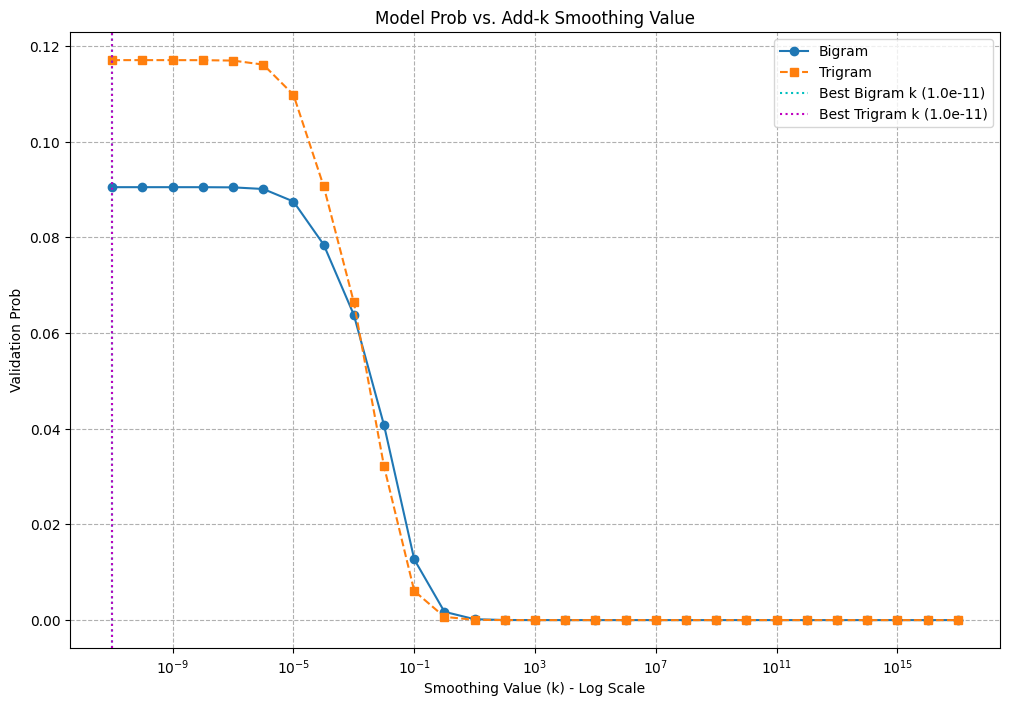

In [73]:
# I used AI to generate the plotting code
# I decided to use log scale for x-axis to make it less sparse


plt.figure(figsize=(12, 8))

plt.plot(ks, bigram_probs, marker="o", linestyle="-", label="Bigram")
plt.plot(
    ks, trigram_probs, marker="s", linestyle="--", label="Trigram"
)

plt.xscale("log")

plt.axvline(
    x=best_bigram_k,
    color="c",
    linestyle=":",
    label=f"Best Bigram k ({best_bigram_k:.1e})",
)
plt.axvline(
    x=best_trigram_k,
    color="m",
    linestyle=":",
    label=f"Best Trigram k ({best_trigram_k:.1e})",
)

plt.xlabel("Smoothing Value (k) - Log Scale")
plt.ylabel("Validation Prob")
plt.title("Model Prob vs. Add-k Smoothing Value")
plt.legend()
plt.grid(True, which="both", ls="--")

plt.show()

Both models' generalization performance seemed to decrease as k increased. Between 10^−4 and 10^2, the average validation probability decreased steeply as k increased, but after k reached around 10^2, it started to plateau, approaching a probability of zero.

I chose a mixture of sherlock & thorugh the looking glass as the validation set because we want to select the k such that makes the model perform the best on the "general" text, not the training set. 


## Part 2: Train and evaluate `distilgpt2` model

In this part, load in the results from your trained `distilgpt2` model from NLPScholar, and evaluate the model. 

In [46]:
import nltk
nltk.download("punkt")

datafpath = "data/alice_in_wonderland.txt"

def preprocess(textfname: str) -> list: # from lab4 w/o mark_ends
    text = ""
    result = []
    with open(textfname) as f:
        for line in f:
            text += line

    sents = nltk.sent_tokenize(text)
    for sent in sents:
        sent = sent.lower()
        sent = sent.replace("\n", " ")
        result.append(sent)
    return result

sents = preprocess(datafpath)

# randomization would've been better but adds unnecessary complexity
train = sents[: int(0.8 * len(sents))] 
val = sents[int(0.8 * len(sents)) :]

h.write_to_tsv("data/train.tsv",["text"], train)
h.write_to_tsv("data/val.tsv",["text"], val)

[nltk_data] Downloading package punkt to /Users/jeong/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# building data.tsv files

aiwl_eval_data = preprocess("data/alice_in_wonderland.txt")
ttlg_eval_data = preprocess("data/through_the_looking_glass.txt")
sh_eval_data = preprocess("data/sherlock_holmes.txt")
columns = ["sentid", "pairid", "comparison", "sentence", "title"]

datas = {"aiwl": aiwl_eval_data, "ttlg": ttlg_eval_data, "sh": sh_eval_data}
rows = []
pairid = 0
sentid = 0
for title, data in datas.items():
    for i in range(len(data)):
        sent = data[i]
        comparison = "expected"
        data[i] = [sentid, pairid, comparison, sent, title]
        rows.append(data[i])
    pairid += 1
    sentid += 1

h.write_to_tsv("data/data.tsv", columns, rows)

In [48]:
df = pd.read_csv("predictions/train_predictions.tsv", sep="\t")

In [49]:
aiwl_mean_prob = df[df["sentid"] == 0]['prob'].mean()
aiwl_mean_surp = df[df["sentid"] == 0]['surp'].mean()
ttlg_mean_prob = df[df["sentid"] == 1]['prob'].mean()
ttlg_mean_surp = df[df["sentid"] == 1]["surp"].mean()
sh_mean_prob = df[df["sentid"] == 2]['prob'].mean()
sh_mean_surp = df[df["sentid"] == 2]["surp"].mean()

In [51]:
print(f"Alice in Wonderland - Mean Prob: {aiwl_mean_prob}, Mean surp: {aiwl_mean_surp}")
print(f"Through the Looking Glass - Mean Prob: {ttlg_mean_prob}, Mean surp: {ttlg_mean_surp}")
print(f"Sherlock Holmes - Mean Prob: {sh_mean_prob}, Mean surp: {sh_mean_surp}")

Alice in Wonderland - Mean Prob: 0.08008815998951664, Mean surp: 10.562219408561326
Through the Looking Glass - Mean Prob: 0.08496458638858641, Mean surp: 10.629867986388843
Sherlock Holmes - Mean Prob: 0.06842533830470568, Mean surp: 11.479169737072185


The mean probabilty of the distilgpt2 model is lower than the bigram & trigram models on TTLG text. However, it has higher mean probability on SH.  

For reference:
```text
[Bigram:TTLG] Ave. Prob.: 0.0989622973179284
[Trigram:TTLG] Ave. Prob.: 0.09500700045732034
[Bigram:SH] Ave. Prob.: 0.050493337998232315
[Trigram:SH] Ave. Prob.: 0.05724471734960672
```

## Part 3: Reflect on the role of tokenizer
In this part, answer the question in `HW3.md` in markdown chunks. If you used external sources to find and make sense of this, please cite them!

While an nltk tokenizer divides text by words, distilgpt2's tokenizer chunks text into subword units. Therefore, the distilgpt2 model calculates probability based on these subwords. This becomes a problem for comparison because an ngram model trained with an nltk tokenizer calculates the probability of a whole word given a context of preceding words, not subwords.

For example, for the word "tokenization," an ngram model would calculate the single probability of P("tokenization" | context). distilgpt2, however, might break the word into ["token", "ization"] and would instead calculate the probability of that sequence. To create a valid comparison, we must train the ngram models with the same subword tokens. This ensures all models are operating on identical units, allowing their performance to be compared fairly with the same metric.

## Part 4 (Optional): Explore the effect of tokenizer and vocab on ngram model performance

In this part, include the results from your experiments (if you choose to attempt this)